In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

import preprocess
import feature_engineering



In [2]:
sns.set(style="whitegrid")

In [3]:
fraud_data_path = '../data/Fraud_Data.csv'
ip_country_path = '../data/IpAddress_to_Country.csv'
credit_card_path = '../data/creditcard.csv'

In [4]:
fraud_df = preprocess.load_data(fraud_data_path)
ip_country_df = preprocess.load_data(ip_country_path)
credit_df = preprocess.load_data(credit_card_path)

In [5]:
fraud_df = preprocess.clean_fraud_data(fraud_df)
print("Fraud_Data.csv cleaned. Shape:", fraud_df.shape)

Fraud_Data.csv cleaned. Shape: (151112, 11)


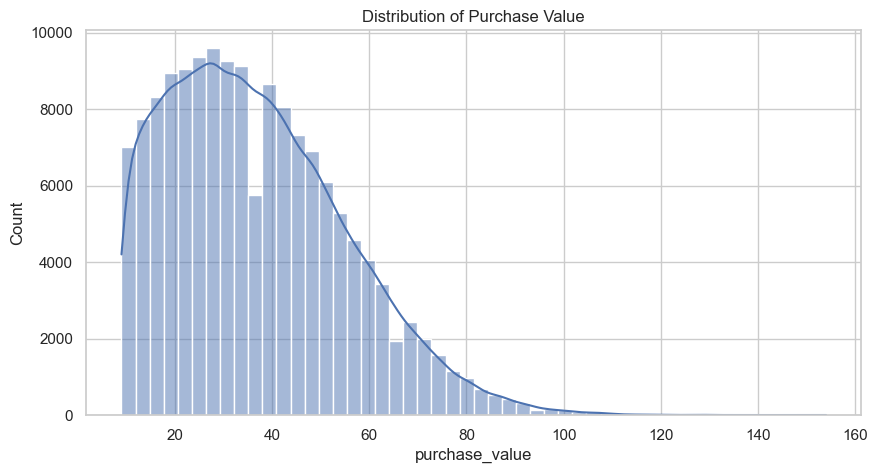

In [6]:
# Univariate Analysis
plt.figure(figsize=(10, 5))
sns.histplot(fraud_df['purchase_value'], bins=50, kde=True)
plt.title('Distribution of Purchase Value')
plt.show()

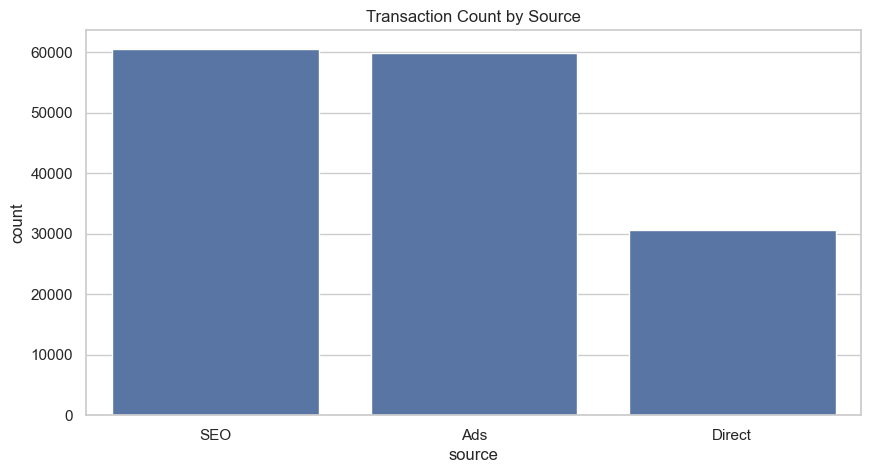

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x='source', data=fraud_df)
plt.title('Transaction Count by Source')
plt.show()

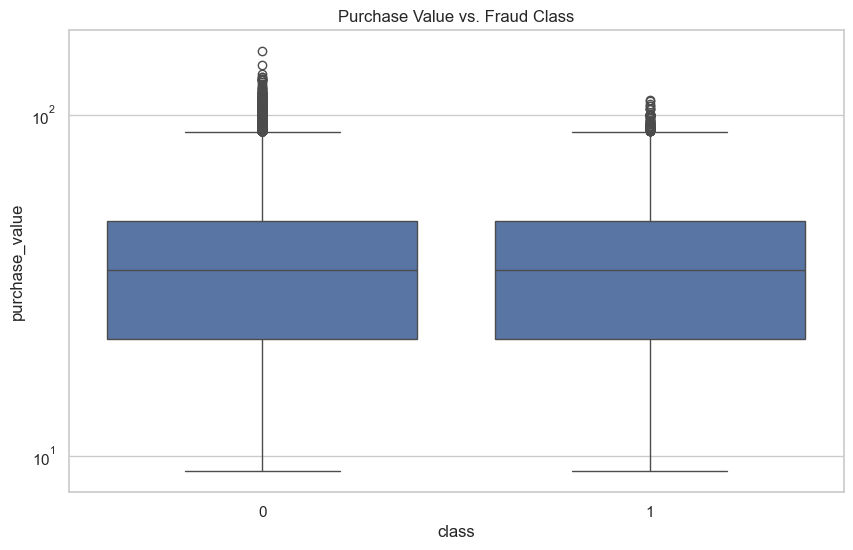

In [8]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title('Purchase Value vs. Fraud Class')
plt.yscale('log') # Use log scale due to outliers
plt.show()

In [9]:
# Time-based features
fraud_df = feature_engineering.create_time_features(fraud_df)
# Time since signup
fraud_df = feature_engineering.time_since_signup(fraud_df)

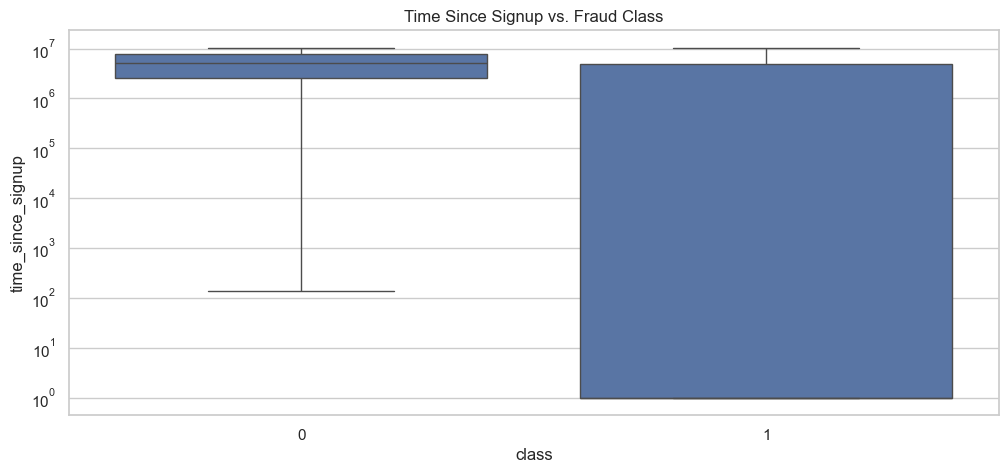

In [10]:
# Plot new features
plt.figure(figsize=(12, 5))
sns.boxplot(x='class', y='time_since_signup', data=fraud_df)
plt.title('Time Since Signup vs. Fraud Class')
plt.yscale('log')
plt.show()

In [11]:
# Convert IP addresses
fraud_df = preprocess.convert_ip_to_int(fraud_df)

In [12]:
fraud_df = preprocess.merge_with_country(fraud_df, ip_country_df)

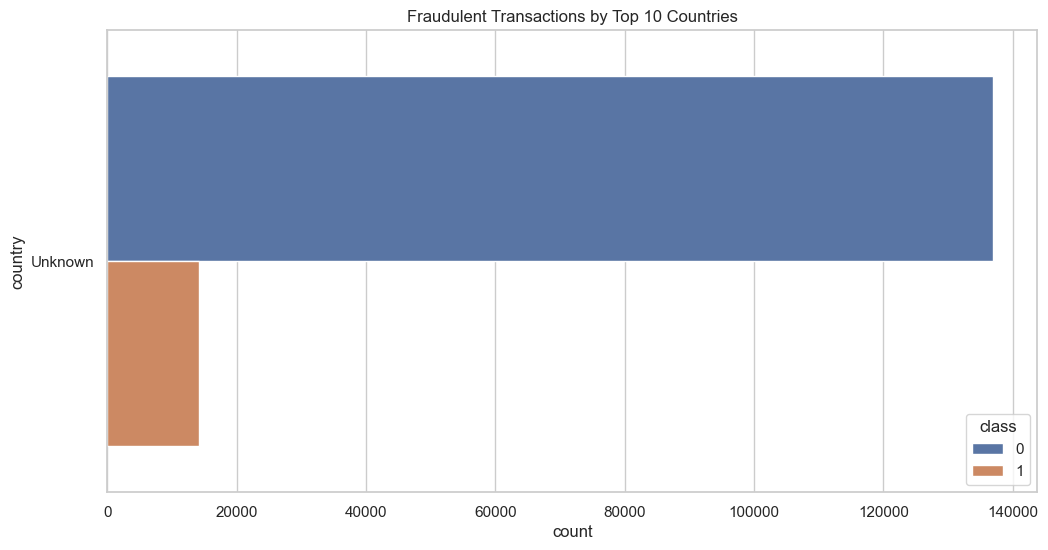

In [13]:
plt.figure(figsize=(12, 6))
top_countries = fraud_df['country'].value_counts().nlargest(10).index
sns.countplot(y='country', data=fraud_df[fraud_df['country'].isin(top_countries)], hue='class', order=top_countries)
plt.title('Fraudulent Transactions by Top 10 Countries')
plt.show()

In [14]:
credit_df = preprocess.clean_credit_card_data(credit_df)
print("\ncreditcard.csv cleaned. Shape:", credit_df.shape)


creditcard.csv cleaned. Shape: (283726, 31)


In [15]:
fraud_percentage = (credit_df['Class'].value_counts(normalize=True) * 100)
print(f"Fraudulent transactions in creditcard.csv: {fraud_percentage[1]:.2f}%")

Fraudulent transactions in creditcard.csv: 0.17%


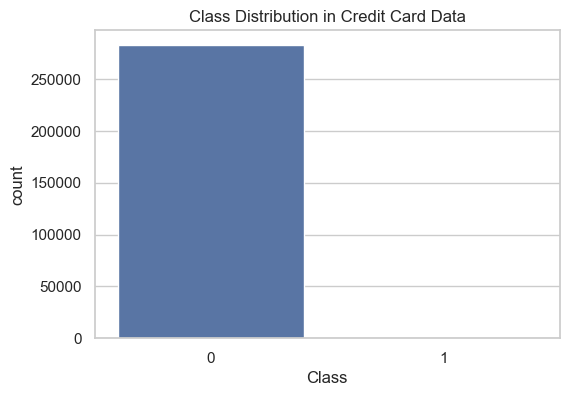

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=credit_df)
plt.title('Class Distribution in Credit Card Data')
plt.show()